In [2]:
import numpy as np
import math
import os
import random
import queue
import matplotlib.pyplot as pl

In [3]:
NP=6
PAGE_SIZE=4096

In [4]:
def init_proc_queue():
    pq=queue.Queue(maxsize=NP)
    proc_queue=list(set((NP*np.random.random(20)).astype('int32')))
    random.shuffle(proc_queue)
    for pr in proc_queue:
        pq.put_nowait(pr)
        
    print(proc_queue)
init_proc_queue()

[0, 2, 5, 1, 3, 4]


In [51]:
def correct_refs(alist,cent,maxpg):
    if cent!=0:
        pgnum=int(cent/PAGE_SIZE)
        lh=(pgnum+1)*PAGE_SIZE-1
        ll=pgnum*PAGE_SIZE
    else:
        lh=maxpg*PAGE_SIZE
        ll=0
        
    for i in range(alist.shape[0]):
        if alist[i]>=lh:
            alist[i]=lh-1
        if alist[i]<ll:
            alist[i]=ll+1
    return alist

def sim_process(M,sigma,outfile,lfrac=0.9):
    cur_page=int(M*np.random.random()) #Generating random start page
    cur_locale=round(PAGE_SIZE*(cur_page+0.5)) #Generating location of current page
    sum_refs=0
    list_locales=list()
    for count in range(M):
        num_refs=int(512+(PAGE_SIZE-512)*np.random.random())
        sum_refs+=num_refs
        list_locales.append(cur_page)
        num_loc=round(lfrac*num_refs)
        aref_list=np.random.normal(cur_locale,sigma*300+100,num_loc)
        aref_list=correct_refs(aref_list,cur_locale,M)
        aref_list=aref_list.astype('int32')
        cur_page=int(M*np.random.random())
        cur_locale=round(PAGE_SIZE*(cur_page+0.5))
        num_trans=round((1-lfrac)*num_refs)
        tref_list=np.random.random(num_trans)*cur_locale
        tref_list=correct_refs(tref_list,0,M)
        tref_list=tref_list.astype('int32')
        outfile
        np.append(aref_list,tref_list).tofile(outfile,sep='\n')
        outfile.write('\n')
    return list_locales,sum_refs
        
      
    print('Current Page',cur_page)
    print('Current Location',cur_locale)
    print('List of Locations',list_locales)
    
npg = int(np.random.normal(10,2.5))
nsig = int(5 * np.random.random())    
fname = 'AR_' + '{:02d}'.format(0) + '.txt'
fname=open(fname,'w')
sim_process(npg,nsig,fname)

([2, 7, 4, 8, 0, 10, 3, 6, 7, 10, 1], 24816)

In [6]:
int(512+(PAGE_SIZE-512)*np.random.random())

2926

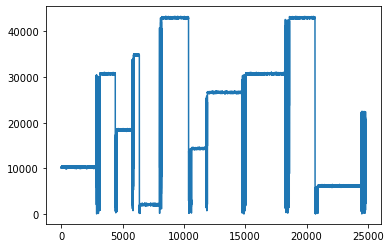

In [52]:
file=np.loadtxt('AR_00.txt')
pl.plot(file)